# Collaborative & Content Filtered Book Recommendation

Berdasarkan salah satu website berjudul [9 Benefits of Watching Anime That Makes You Smarter](https://animemotivation.com/benefits-of-watching-anime/), menonton anime dapat memberikan banyak keuntungan. Salah satunya adalah kita dapat mendapatkan pelajaran hidup dan mempelajari budaya Jepang.

<img src= "https://wallpaperaccess.com/full/39033.png" alt ="Anime">

___
# Importing Libraries and Dataset

## Importing Libraries

Kode berikut saya melakukan import libraries yang diperlukan pada proyek ini.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os

Kode berikut saya menginstall library kaggle.

In [3]:
! pip install -q kaggle

Kode berikut saya import library files dan melakukan upload file kaggle API.

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kevin478763","key":"7781ae22a3c268bc560d7a1c711049ae"}'}

Kode berikut saya membuat folder bernama kaggle dan memasukkan file yang sebelumnya saya upload ke dalam folder tersebut.

In [5]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

Kode berikut saya memberi akses supaya dapat read dan write pada file kaggle.

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

Kode berikut saya men-*download* dataset yang terdapat di kaggle.

In [7]:
! kaggle datasets download hernan4444/anime-recommendation-database-2020

 99% 654M/661M [00:05<00:00, 127MB/s]
100% 661M/661M [00:05<00:00, 118MB/s]


Kode berikut saya mengimpor zipfile dan melakukan extract kepada dataset yang telah saya download sebelumnya.

In [8]:
import zipfile,os

localZip = '/content/anime-recommendation-database-2020.zip'
zipRef = zipfile.ZipFile(localZip, 'r')
zipRef.extractall('/temp/anime')
zipRef.close()

Kode berikut untuk melihat daftar folder yang terdapat dalam file zip yang sudah di-*extract* sebelumnya.

In [9]:
os.listdir('/temp/anime')

['watching_status.csv',
 'animelist.csv',
 'anime.csv',
 'anime_with_synopsis.csv',
 'rating_complete.csv',
 'html folder']

## Importing Dataset

Kode berikut digunakan untuk membaca anime.csv dan rating_complete.csv.
Saya hanya menggunakan dua data ini dikarenakan animelist.csv merupakan gabungan anime.csv dan rating_complete, sedangkan watching_status.csv tidak mengandung data yang signifikan.

In [10]:
anime_dataset = pd.read_csv('/temp/anime/anime.csv')
rating_dataset = pd.read_csv('/temp/anime/rating_complete.csv')

Kode berikut digunakan untuk melihat bentuk dari dataset anime.

In [11]:
anime_dataset.shape

(17562, 35)

Kode berikut digunakan untuk melihat bentuk dari dataset rating.

In [12]:
rating_dataset.shape

(57633278, 3)

# Data Preprocessing

Kode berikut digunakan untuk melihat 5 kolom pertama dari rating dataset.

In [13]:
rating_dataset.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


Dikarenakan jumlah data yang sangat banyak, saya akan mengambil sebagian kecil saja dari dataset.

In [14]:
anime_dataset = anime_dataset[:10000]
rating_dataset=rating_dataset[:30000]

Kode berikut digunakan untuk melihat 5 kolom pertama dari rating dataset.

In [15]:
rating_dataset.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


Kode berikut digunakan untuk melihat 5 kolom pertama dari anime dataset.

In [16]:
anime_dataset.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


Kode berikut digunakan untuk mengidentifikasi anime yang mempunyai rating tertinggi, yaitu 10.

In [17]:
rating_dataset[rating_dataset.rating == max(rating_dataset.rating)]
best_animeId = rating_dataset.anime_id[rating_dataset.rating == max(rating_dataset.rating)]
best_animeId = list(dict.fromkeys(best_animeId))

Kode berikut digunakan memasukkan anime yang mempunyai rating 10 ke dalam variabel best_anime.

In [18]:
best_anime = []
for i in best_animeId:
    anime_name = anime_dataset.Name[anime_dataset.MAL_ID == i]
    best_anime.append(anime_name)

Kode berikut digunakan untuk melihat daftar 25 pertama dari variabel best_anime.

In [19]:
best_anime[:25]

[542    Hotaru no Haka
 Name: Name, dtype: object, 1427    Ghost Hunt
 Name: Name, dtype: object, 388    Tonari no Yamada-kun
 Name: Name, dtype: object, 2049    Toki wo Kakeru Shoujo
 Name: Name, dtype: object, Series([], Name: Name, dtype: object), 10    Naruto
 Name: Name, dtype: object, 1574    Naruto: Shippuuden
 Name: Name, dtype: object, 1431    Code Geass: Hangyaku no Lelouch
 Name: Name, dtype: object, 3971    Fullmetal Alchemist: Brotherhood
 Name: Name, dtype: object, 5683    Steins;Gate
 Name: Name, dtype: object, Series([], Name: Name, dtype: object), 176    Sen to Chihiro no Kamikakushi
 Name: Name, dtype: object, 7449    Shingeki no Kyojin
 Name: Name, dtype: object, 9383    Shingeki no Kyojin Season 2
 Name: Name, dtype: object, Series([], Name: Name, dtype: object), Series([], Name: Name, dtype: object), 6565    Steins;Gate Movie: Fuka Ryouiki no Déjà vu
 Name: Name, dtype: object, Series([], Name: Name, dtype: object), 1393    Death Note
 Name: Name, dtype: object, 26

Kode berikut digunakan untuk melihat jumlah anime yang memiliki rating 10.

In [20]:
len(best_anime)

1452

Kode berikut digunakan untuk melihat diagram yang menunjukkan rating yang diberikan oleh pengguna. 

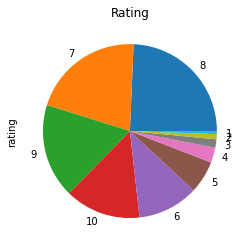

In [21]:
count = rating_dataset["rating"].value_counts()
count.plot(kind='pie', title="Rating");
 
plt.show()

Kode berikut digunakan untuk melihat diagram kapan sebuah anime ditayangkan.

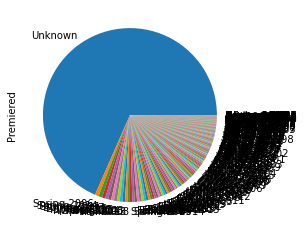

In [22]:
count = anime_dataset["Premiered"].value_counts()
count.plot(kind='pie');
 
plt.show()

Kode berikut digunakan untuk melihat pairplot pada dataset rating.

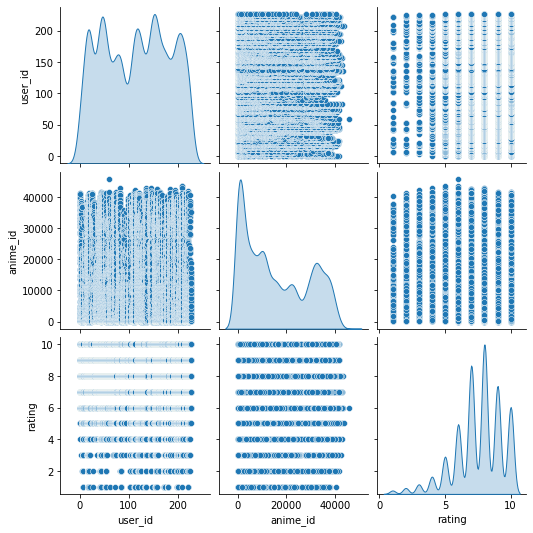

In [23]:
import seaborn as sns
sns.pairplot(rating_dataset, diag_kind = 'kde')


# Content Filtered Recommendation System

Content-based filtering adalah sebuah tipe sistem rekomendasi yang mencoba untuk menebak apa yang mungkin pengguna sukai berdasarkan aktivitas pengguna tersebut. Content-based filtering membuat rekomendasi dengan menggunakan kata kunci dan atribut yang ditentukan ke objek dalam sebuah database.

##Data preparation

Kode berikut digunakan untuk drop nilai NaN pada semua dataset.

In [24]:
anime_dataset = anime_dataset.dropna()
rating_dataset = rating_dataset.dropna()

Kode berikut digunakan untuk drop kolom-kolom yang memiliki nilai Unknkown pada dataset.

In [25]:
anime_dataset = anime_dataset[anime_dataset.Premiered != "Unknown"]
anime_dataset = anime_dataset[anime_dataset.Studios != "Unknown"]

Kode berikut digunakan untuk menampilkan diagram kapan sebuah anime ditayangkan setelah melakukan cleaning dataset.

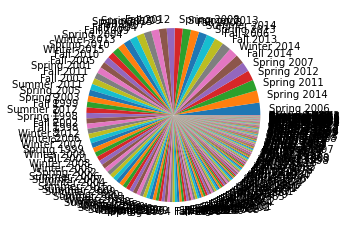

In [26]:
count = anime_dataset["Premiered"].value_counts()
count.plot(kind='pie');
 
plt.show()

Kode berikut digunakan untuk melihat nilai null pada dataset anime.

In [27]:
anime_dataset.isnull().sum()

MAL_ID           0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

Kode berikut digunakan untuk melihat nilai null pada dataset rating.

In [28]:
rating_dataset.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

Karena kedua dataset sudah tidak memiliki nilai null maka dipastikan dataset sudah bersih.

Kode berikut digunakan untuk melakukan drop kolom yang memiliki duplikat.

In [29]:
rating_dataset = rating_dataset.drop_duplicates()
anime_dataset = anime_dataset.drop_duplicates()

Kode berikut digunakan untuk melihat bentuk dataset anime setelah cleaning.

In [30]:
anime_dataset.shape

(2764, 35)

Kode berikut digunakan untuk melihat bentuk dataset rating setelah cleaning.

In [31]:
rating_dataset.shape

(30000, 3)

Kode berikut digunakan untuk melihat daftar 5 pertama dari dataset anime.

In [32]:
anime_dataset.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...","VIZ Media, Sentai Filmworks",Gallop,Manga,23 min. per ep.,PG-13 - Teens 13 or older,604.0,1003,148259,2066,13907,78349,14228,11573,30202,9226.0,14904.0,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0


Kode berikut digunakan untuk menampung data-data yang penting dari dataset anime ke dalam list.

In [33]:
anime_name = anime_dataset.Name.tolist()
anime_id = anime_dataset.MAL_ID.tolist()
anime_studio = anime_dataset.Studios.tolist()
anime_premiered = anime_dataset.Premiered.tolist()

Kode berikut digunakan untuk membuat dataframe baru dari variabel-variabel yang sudah dibuat sebelumnya.

In [34]:
anime = pd.DataFrame({
    'anime_id': anime_id,
    'anime_name': anime_name,
    'studio': anime_studio,
    'premiered': anime_premiered
})
anime

,anime_id,anime_name,studio,premiered
0,1,Cowboy Bebop,Sunrise,Spring 1998
1,6,Trigun,Madhouse,Spring 1998
2,7,Witch Hunter Robin,Sunrise,Summer 2002
3,8,Bouken Ou Beet,Toei Animation,Fall 2004
4,15,Eyeshield 21,Gallop,Spring 2005
...,...,...,...,...
2759,29067,Danna ga Nani wo Itteiru ka Wakaranai Ken 2 Su...,Seven,Spring 2015
2760,29095,Grisaia no Rakuen,8bit,Spring 2015
2761,29099,Washimo 2nd Season,Studio Deen,Winter 2015
2762,29163,Sore ga Seiyuu!,Gonzo,Summer 2015


## Modeling

Kode berikut digunakan untuk mengidentifikasi kata-kata penting dari nama studio sebuah anime.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(anime['studio']) 
tf.get_feature_names() 

['21',
 '3hz',
 '80',
 '8bit',
 'academy',
 'acc',
 'actas',
 'aic',
 'ajia',
 'amber',
 'amuse',
 'animaruya',
 'animation',
 'animations',
 'annapuru',
 'anpro',
 'answer',
 'appp',
 'arcs',
 'arms',
 'arrow',
 'artland',
 'artmic',
 'arts',
 'asahi',
 'ascension',
 'ashi',
 'asread',
 'assez',
 'asta',
 'aubec',
 'azeta',
 'bandai',
 'barnum',
 'base',
 'basic',
 'bee',
 'beijing',
 'bestack',
 'blanc',
 'bogey',
 'bones',
 'bouncy',
 'brain',
 'bridge',
 'bu',
 'bugyousho',
 'build',
 'bus',
 'c2c',
 'cartoon',
 'chaos',
 'charaction',
 'citrus',
 'classic',
 'code',
 'com',
 'comet',
 'communications',
 'company',
 'connect',
 'cookie',
 'corporation',
 'creators',
 'crocodile',
 'cucuri',
 'cyclone',
 'daewon',
 'dai',
 'daume',
 'david',
 'dax',
 'deen',
 'digital',
 'diomedéa',
 'dle',
 'do',
 'doga',
 'dongwoo',
 'dongyang',
 'dot',
 'douga',
 'duce',
 'dwarf',
 'echo',
 'echoes',
 'egg',
 'ei',
 'eigasha',
 'eiken',
 'emt',
 'encourage',
 'enoki',
 'enterprises',
 'entertainm

Kode berikut digunakan untuk melakukan transformasi dan fit ke dalam metriks dan menampilkan bentuk dari metriks tersebut.

In [36]:
tfidf_matrix = tf.fit_transform(anime['studio']) 
 
tfidf_matrix.shape 

(2764, 308)

Kode berikut digunakan untuk mengubah variable tfidf_matrix yang semula vektor menjadi metriks.

In [37]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Kode berikut digunakan untuk melihat matriks dari judul anime dengan studionya.

In [38]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=anime.anime_name
).sample(10, axis=1,replace=True).sample(10, axis=0)

,nomad,in,wit,sanzigen,white,ichi,three,do,real,gainax
anime_name,,,,,,,,,,
Majokko Tickle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Touka Gettan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kami nomi zo Shiru Sekai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Maria†Holic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Akai Koudan Zillion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ikinari Dagon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mugen no Ryvius,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Youyou no Neko Tsumami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hello Kitty: Ringo no Mori to Parallel Town,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Kode berikut digunakan untuk mengidentifikasi derajat kesamaan dengan menggunakan cosine similarity.

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Kode berikut digunakan untuk membuat dataframe cosine_sim_df dengan baris dan kolomnya adalah judul anime.

In [40]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime['anime_name'], columns=anime['anime_name'])

Kode berikut digunakan untuk membuat rekomendasi anime sebanyak k buah, dalam kasus ini adalah 5, berdasarkan nilai cosine similarity dengan tingkat kesamaan dari yang paling tinggi.

In [41]:
def studio_recommendations(i, M, items, k=5):
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    closest = M.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Kode berikut digunakan untuk menampung contoh judul anime yang telah ditonton dan menampilkannya".

In [42]:
anime_that_have_been_watched = "Naruto: Shippuuden"
anime[anime.anime_name.eq(anime_that_have_been_watched)]

,anime_id,anime_name,studio,premiered
781,1735,Naruto: Shippuuden,Studio Pierrot,Winter 2007


Kode berikut digunakan untuk mendapatkan rekomendasi dari anime "Naruto: Shippuuden".

In [43]:
recommendations = studio_recommendations(anime_that_have_been_watched, cosine_sim_df, anime[['anime_name', 'studio']])

Kode berikut digunakan untuk melakukan drop kolom duplikat.

In [44]:
recommendations = recommendations.drop_duplicates()

Kode berikut digunakan untuk menampilkan anime rekomendasi.

In [45]:
recommendations

,anime_name,studio
0,Blue Dragon: Tenkai no Shichi Ryuu,Studio Pierrot
1,Mahou no Star Magical Emi,Studio Pierrot
2,Neo Ranga,Studio Pierrot
3,Shirokuma Cafe,Studio Pierrot
4,Mahou no Yousei Persia,Studio Pierrot


## Evaluasi

Kode berikut digunakan untuk mengidentifikasi baris anime yang telah ditonton dan studio dari anime tersebut.

In [46]:
anime_that_have_been_watched_row = anime_dataset[anime_dataset.Name == anime_that_have_been_watched]
anime_that_have_been_watched_studio = anime_that_have_been_watched_row.iloc[0]["Studios"]

Kode berikut digunakan untuk menampung list studio dari varaibel recommendations.

In [47]:
anime_recommendation_studio = recommendations.studio

Kode berikut digunakan untuk mengecek jumlah studio yang ada pada list tersebut. Jika sama maka nilai real_studio akan bertambah 1. 

In [48]:
real_studio = 0
for i in range(5):
    if anime_recommendation_studio[i] == anime_that_have_been_watched_studio:
        real_studio+=1

Kode berikut digunakan untuk mengukur akurasi dari model. Dikarenakan sebelumnya jumlah rekomendasi saya tetapkan 5 buah, maka akurasi dihitung dengan cara membaginya dengan 5 dan kali dengan 100.

In [49]:
Precision = real_studio/5*100
print("Precision of the model is {}%".format(Precision))

Precision of the model is 100.0%


Akurasi 100% menunjukkan bahwa studio yang terdapat pada rekomendasi semuanya sama.

# Collaborative Filtering Recommendation

Collaborative filtering adalah sistem rekomendasi yang membuat prediksi berdasarkan riwayat aktivitas-aktivitas dari pengguna.
Collaborative filtering cenderung mencari apa yang diinginkan pengguna untuk mengklasifikasikan pengguna-pengguna dalam cluster dengan tipe yang sama dan merekomendasikan setiap pengguna sesuai dengan preferensi clusternya.


## Data Preparation

Kode berikut digunakan untuk membuat list dari user_id dan mengubah user_id menjadi integer.

In [50]:
user_id = rating_dataset['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}

Kode berikut digunakan untuk membuat list dari anime_id dan mengubah anime_id menjadi integer.

In [51]:
anime_id = rating_dataset['anime_id'].unique().tolist()
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_id)}
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_id)}

rating_dataset['user'] = rating_dataset['user_id'].map(user_to_user_encoded)
rating_dataset['anime'] = rating_dataset['anime_id'].map(anime_to_anime_encoded)

Kode berikut digunakan untuk mengecek jumlah user dan anime

In [52]:
num_users = len(user_encoded_to_user)
print(num_users)
num_anime = len(anime_encoded_to_anime)
print(num_anime)
rating_dataset['rating'] = rating_dataset['rating'].values.astype(np.float32)

min_rating = min(rating_dataset['rating'])
max_rating = max(rating_dataset['rating'])
 
print('Number of User: {} \nNumber of Anime: {} \nMin Rating: {} \nMax Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

195
4758
Number of User: 195 
Number of Anime: 4758 
Min Rating: 1.0 
Max Rating: 10.0


## Dataset Splitting

Kode berikut digunakan untuk memberi index random pada dataset.

In [53]:
rating_dataset = rating_dataset.sample(frac=1, random_state=42)
rating_dataset

,user_id,anime_id,rating,user,anime
2308,17,23311,7.0,16,1398
22404,172,16005,7.0,149,1698
23397,174,11123,6.0,151,2098
25058,193,32182,9.0,165,143
2664,19,23327,7.0,18,1546
...,...,...,...,...,...
29802,226,11111,8.0,193,324
5390,42,30042,2.0,39,2385
860,6,143,10.0,6,744
15795,122,37171,8.0,107,1687


Kode berikut digunakan untuk melakukan pembagian data set. Dengan 0.75 data training dan 0.25 data validasi.

In [54]:
x = rating_dataset[['user', 'anime']].values
 
y = rating_dataset['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.75 * rating_dataset.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[  16 1398]
 [ 149 1698]
 [ 151 2098]
 ...
 [   6  744]
 [ 107 1687]
 [ 154 1512]] [0.66666667 0.66666667 0.55555556 ... 1.         0.77777778 0.55555556]


## Modeling

Kode berikut digunakan untuk mengimpor library yang dibutuhkan untuk melakukan modeling.

In [55]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

Pada kode berikut saya menggunakan RecommenderNet untuk membuat model *collaborative filtering*.

In [56]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.anime_embedding = layers.Embedding( 
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    anime_vector = self.anime_embedding(inputs[:, 1])
    anime_bias = self.anime_bias(inputs[:, 1]) 
 
    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2) 
 
    x = dot_user_anime + user_bias + anime_bias
    
    return tf.nn.sigmoid(x) 

Kode berikut digunakan untuk melakukan compile pada model dengan menggunakan metrik RMSE(Root Mean Squared Error).

In [57]:
model = RecommenderNet(num_users, num_anime, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Kode berikut digunakan untuk melakukan fit pada model dan menampungnya riwayatnya.

In [58]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 5,
    epochs = 20,
    validation_data = (x_val, y_val)
)

Epoch 1/20
4500/4500 [==============================] - 22s 4ms/step - loss: 0.6053 - root_mean_squared_error: 0.2227 - val_loss: 0.5649 - val_root_mean_squared_error: 0.1768
Epoch 2/20
4500/4500 [==============================] - 19s 4ms/step - loss: 0.5539 - root_mean_squared_error: 0.1645 - val_loss: 0.5557 - val_root_mean_squared_error: 0.1666
Epoch 3/20
4500/4500 [==============================] - 19s 4ms/step - loss: 0.5447 - root_mean_squared_error: 0.1536 - val_loss: 0.5517 - val_root_mean_squared_error: 0.1624
Epoch 4/20
4500/4500 [==============================] - 19s 4ms/step - loss: 0.5390 - root_mean_squared_error: 0.1461 - val_loss: 0.5492 - val_root_mean_squared_error: 0.1596
Epoch 5/20
4500/4500 [==============================] - 18s 4ms/step - loss: 0.5350 - root_mean_squared_error: 0.1408 - val_loss: 0.5475 - val_root_mean_squared_error: 0.1576
Epoch 6/20
4500/4500 [==============================] - 18s 4ms/step - loss: 0.5330 - root_mean_squared_error: 0.1378 - val_l

## Visualisasi

Kode berikut digunakan untuk menampilkan hasil fit dalam bentuk grafik.

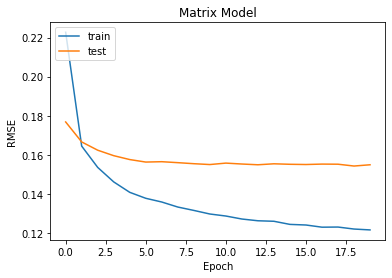

In [59]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Matrix Model')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Rekomendasi

Kode berikut digunakan untuk menetapkan variabel anime_dataset dan rating_dataset.

In [60]:
anime_dataset =  anime
rating_dataset = rating_dataset

Kode berikut digunakan untuk mengambil user_id secara acak dan melihat anime apa saja yang telah ia tonton.

In [61]:
user_id = rating_dataset.user_id.sample(1).iloc[0]
anime_have_been_watched_by_user = rating_dataset[rating_dataset.user_id == user_id]
 
anime_have_not_been_watched_by_user = anime_dataset[anime_dataset['anime_id'].isin(anime_have_been_watched_by_user.anime_id.values)]['anime_id'] 
anime_have_not_been_watched_by_user = list(
    set(anime_have_not_been_watched_by_user)
    .intersection(set(anime_to_anime_encoded.keys()))
)
 
anime_have_not_been_watched_by_user = [[anime_to_anime_encoded.get(x)] for x in anime_have_not_been_watched_by_user]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_have_not_been_watched_by_user), anime_have_not_been_watched_by_user)
)

Kode berikut digunakan untuk memberikan rekomendasi anime sebanyak 10 buah.

In [62]:
ratings = model.predict(user_anime_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_id = [
    anime_encoded_to_anime.get(anime_have_not_been_watched_by_user[x][0]) for x in top_ratings_indices
]
 
top_anime_recommended = (
    anime_have_been_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)
 
anime_row = anime_dataset[anime_dataset['anime_id'].isin(top_anime_recommended)]
for row in anime_row.itertuples():
    print(row.anime_name, ':', row.studio)
 
print('----' * 12)
print('Top 10 anime Recommendation for user: {}'.format(user_id))
print('----' * 12)
 
recommended_anime = anime_dataset[anime_dataset['anime_id'].isin(recommended_anime_id)]

i=1
for row in recommended_anime.itertuples():
    print('{}. '.format(i), row.anime_name, ':', row.studio)
    i+=1

Great Teacher Onizuka : Studio Pierrot
Fullmetal Alchemist: Brotherhood : Bones
Love Live! School Idol Project : Sunrise
Kekkai Sensen : Bones
JoJo no Kimyou na Bouken Part 3: Stardust Crusaders 2nd Season : David Production
------------------------------------------------
Top 10 anime Recommendation for user: 211
------------------------------------------------
1.  Kenpuu Denki Berserk : OLM
2.  Great Teacher Onizuka : Studio Pierrot
3.  Hajime no Ippo : Madhouse
4.  Tengen Toppa Gurren Lagann : Gainax
5.  Clannad: After Story : Kyoto Animation
6.  Fullmetal Alchemist: Brotherhood : Bones
7.  Rainbow: Nisha Rokubou no Shichinin : Madhouse
8.  Steins;Gate : White Fox
9.  Hunter x Hunter (2011) : Madhouse
10.  Monogatari Series: Second Season : Shaft
